In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
experiment_result_folder = '/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/evaluation/'
data_folder = '/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/data/'

In [2]:
def sort_in_order(score_data):
    g = score_data.groupby('protein_family')
    s = g.head(1).sort_values('method')
    dg = g.groups

    score_data = pd.concat([score_data.reindex(dg[i[1]]) for i in s.items()])
    return score_data

# 1 - DIFFERENCE IN INDEL EVENTS

Difference in indel events is evaluated for every ancestor child pair in the phylogenetic tree in the top down tree traversal fashion. Examples of this score is shown below. The score plotted in the graph below is the addition of pair wise difference across the whole phylogenetic tree.



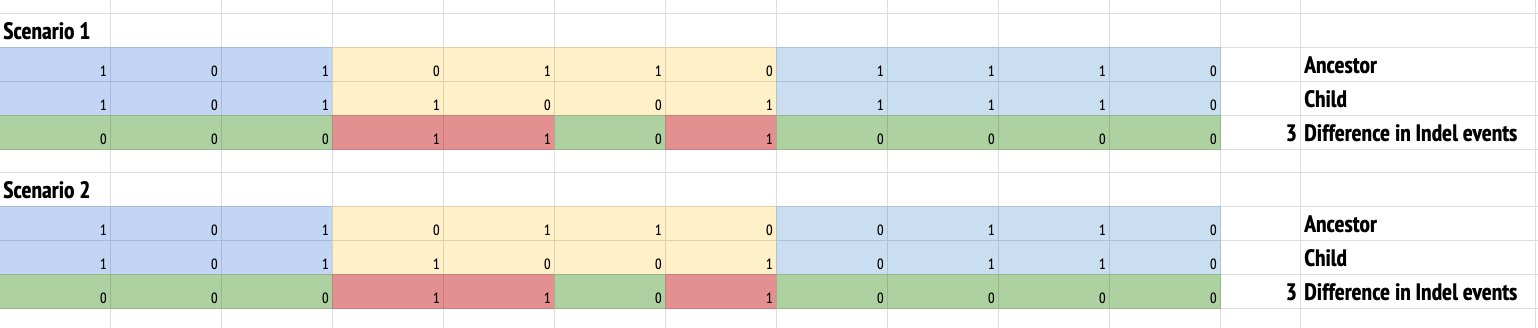


In [3]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'indel_diff_evaluation.csv', 'w') as outfile:
    outfile.write('protein_family,method,score\n')
    for pr in ['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000']:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*indscore*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 

,protein_family,method,score
0,CYP2U_165,bep,527
2,CYP2U_165,mip,492
3,CYP2U_165,sicp,540
1,CYP2U_165,psp,519
4,MBL_243,bep,1593
6,MBL_243,mip,1371
7,MBL_243,sicp,1929
5,MBL_243,psp,1481
8,CYP2U_359,bep,259
10,CYP2U_359,mip,248


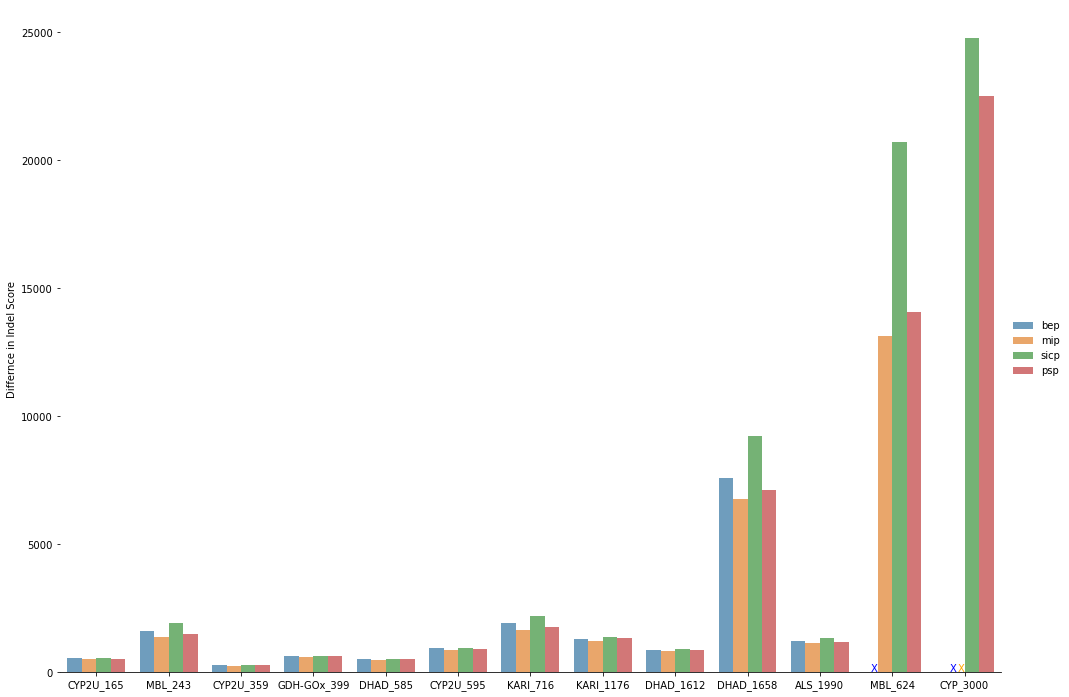

In [12]:
score_data = pd.read_csv(experiment_result_folder + 'indel_diff_evaluation.csv')
score_data['method'] = pd.Categorical(score_data['method'], ["bep", "mip", "sicp","psp"])
score_data['protein_family'] = pd.Categorical(score_data['protein_family'],['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000'])
score_data = score_data.sort_values(['protein_family',"method"])

display(score_data.head(10))
g = sns.catplot(data = score_data, kind='bar', x="protein_family", y="score", hue="method", alpha=.7, height=10, aspect=11.7/8.27)
g.despine(left=True)

# annotate for missing solution
ax1= g.axes[0][0]
ax1.text(10.7,25, "X",color='blue')
ax1.text(11.8,25, "X",color='blue')
ax1.text(11.9,25, "X",color='orange')

g.set_axis_labels("", "Differnce in Indel Score")

# 2 - OUT OF DISTRIBUTION PATTERNS


Indel inference for an ancestor is based on different edges present in the extant sequences in the phylogenetic tree. Any ancestral indel pattern containing a atleast 1 new edge which is not present in the extant sequence is considered as an out of distribution indel pattern as it can't be explained by the patterns seen in the extant sequences.

The metric tracked below is % of ancestors having atleast 1 edge which is out of distribution.

In [5]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'out_of_dist_evaluation.csv', 'w') as outfile:
    outfile.write('protein_family,method,out_of_dist_percent\n')
    for pr in ['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000']:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*out_dist_percent*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 

,protein_family,method,out_of_dist_percent
0,CYP2U_165,bep,0.0
2,CYP2U_165,mip,0.0
1,CYP2U_165,sicp,0.0
3,CYP2U_165,psp,6.7
4,MBL_243,bep,0.0
6,MBL_243,mip,0.0
5,MBL_243,sicp,0.0
7,MBL_243,psp,13.2
8,CYP2U_359,bep,0.0
10,CYP2U_359,mip,0.0


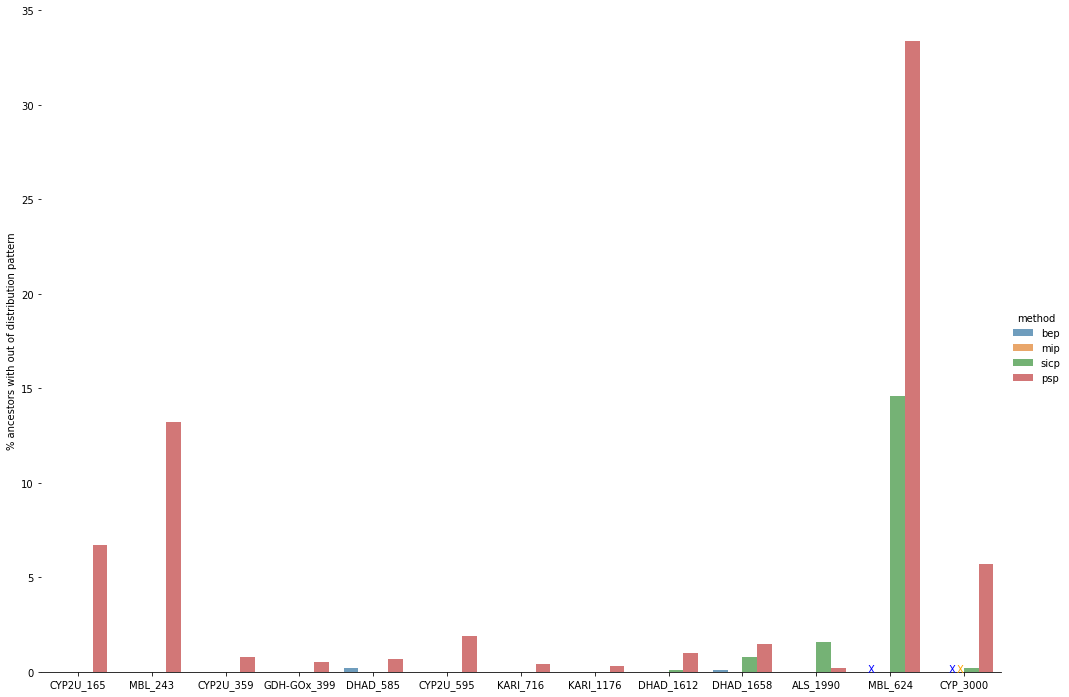

In [20]:
out_of_dist_data = pd.read_csv(experiment_result_folder + 'out_of_dist_evaluation.csv')
out_of_dist_data['method'] = pd.Categorical(out_of_dist_data['method'], ["bep", "mip", "sicp","psp"])
out_of_dist_data['protein_family'] = pd.Categorical(out_of_dist_data['protein_family'],['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000'])
out_of_dist_data = out_of_dist_data.sort_values(['protein_family',"method"])

display(out_of_dist_data.head(10))
g = sns.catplot(data = out_of_dist_data, kind='bar', x="protein_family", y="out_of_dist_percent", hue="method",  alpha=.7, height=10, aspect=11.7/8.27)
g.despine(left=True)

# annotate for missing solution
ax1= g.axes[0][0]
ax1.text(10.7,0, "X",color='blue')
ax1.text(11.8,0, "X",color='blue')
ax1.text(11.9,0, "X",color='orange')

g.set_axis_labels("", "% ancestors with out of distribution pattern")

# 3 - COHESIVENESS MEASURE

We define cohesiveness as the quality of reasoning about that indel evolutionary history as united whole in phylogenetic tree. MIP allows to reason this by framing this as single optimisation problem across a whole tree rather than a local decision at a ancestral branchpoint.

### 3.1 -  ANCESTORS WITH 3 MUTATION AWAY FROM ITS NEIGHBOURS

The metric tracked here is the % of ancestors whose position wise indel pattern is totally different than its parent and its 2 children.

Example in the figure below.

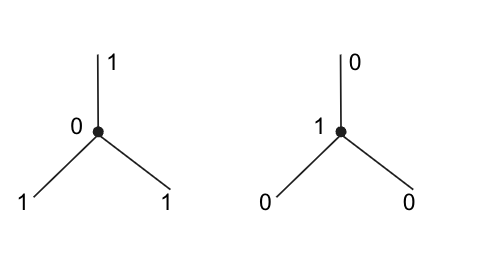

In [7]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'ancestors_3_mutation_away.csv', 'w') as outfile:
    outfile.write('protein_family,method,ancestors_3_mutation_percent\n')
    for pr in ['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000']:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*ancestors_with_3_mut*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 

,protein_family,method,ancestors_3_mutation_percent
1,CYP2U_165,bep,1.22
0,CYP2U_165,mip,0.00
3,CYP2U_165,sicp,0.00
2,CYP2U_165,psp,0.00
5,MBL_243,bep,2.07
4,MBL_243,mip,0.00
7,MBL_243,sicp,2.07
6,MBL_243,psp,0.00
9,CYP2U_359,bep,0.00
8,CYP2U_359,mip,0.00


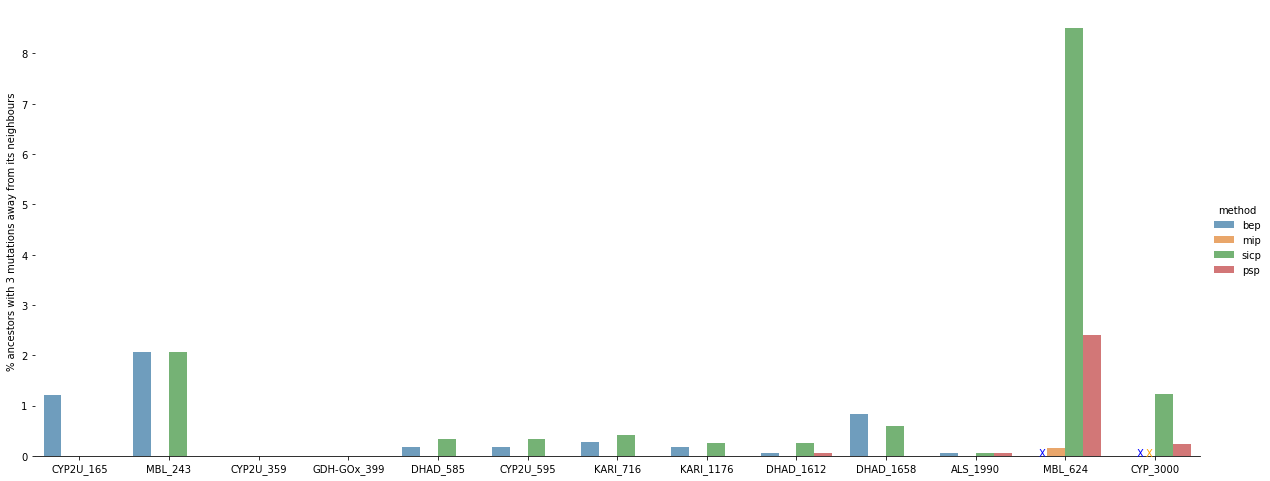

In [21]:
a_3_mut_data = pd.read_csv(experiment_result_folder + 'ancestors_3_mutation_away.csv')
a_3_mut_data['method'] = pd.Categorical(a_3_mut_data['method'], ["bep", "mip", "sicp","psp"])
a_3_mut_data['protein_family'] = pd.Categorical(a_3_mut_data['protein_family'],['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000'])
a_3_mut_data = a_3_mut_data.sort_values(['protein_family',"method"])

display(a_3_mut_data.head(10))
g = sns.catplot(data = a_3_mut_data, kind='bar', x="protein_family", y="ancestors_3_mutation_percent", hue="method", alpha=.7, height=7, aspect=20/8.27)
g.despine(left=True)

# annotate for missing solution
ax1= g.axes[0][0]
ax1.text(10.7,0, "X",color='blue')
ax1.text(11.8,0, "X",color='blue')
ax1.text(11.9,0, "X",color='orange')
g.set_axis_labels("", "% ancestors with 3 mutations away from its neighbours")

### 3.2 -  ANCESTORS WITH 2 MUTATION AWAY FROM ITS NEIGHBOURS

The metric tracked here is the % of ancestors whose position wise indel pattern is nearly different than its parent and its 2 children.

Example in the figure below.

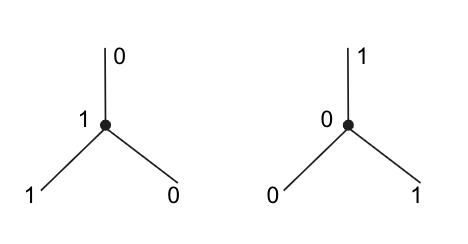

In [9]:
# read all score files for all protein families in the folder
with open(experiment_result_folder + 'ancestors_2_mutation_away.csv', 'w') as outfile:
    outfile.write('protein_family,method,ancestors_2_mutation_percent\n')
    for pr in ['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000']:
        os.chdir(data_folder + pr + '/')
        for fname in glob.glob("*ancestors_with_2_mut*"):
            with open(fname) as infile:
                for line in infile:
                    outfile.write(pr +',' + line + '\n') 

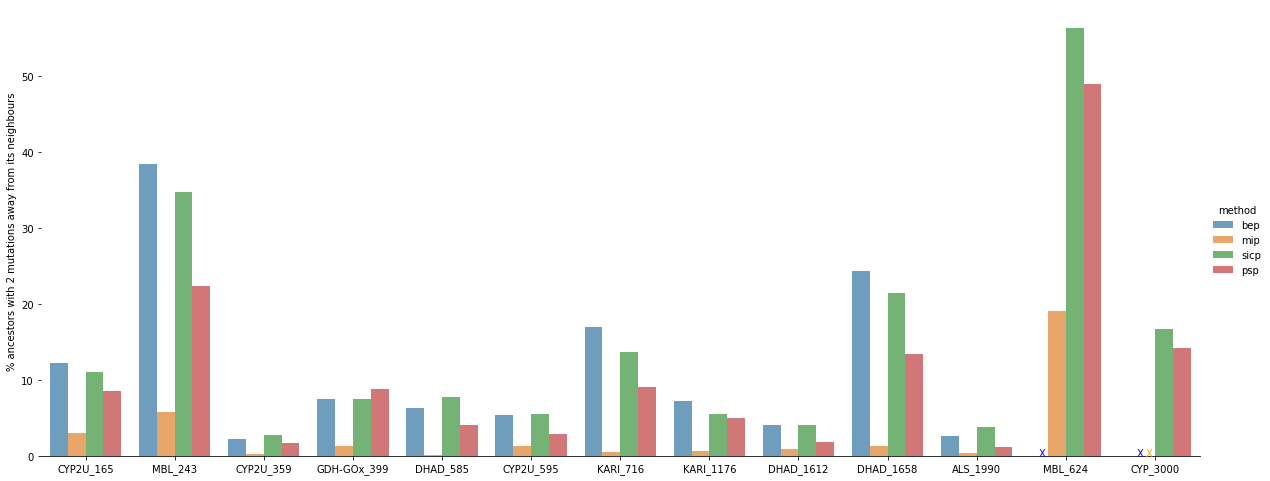

In [22]:
a_2_mut_data = pd.read_csv(experiment_result_folder + 'ancestors_2_mutation_away.csv')
a_2_mut_data['method'] = pd.Categorical(a_2_mut_data['method'], ["bep", "mip", "sicp","psp"])
a_2_mut_data['protein_family'] = pd.Categorical(a_2_mut_data['protein_family'],['CYP2U_165','MBL_243','CYP2U_359','GDH-GOx_399','DHAD_585','CYP2U_595','KARI_716','KARI_1176','DHAD_1612','DHAD_1658','ALS_1990','MBL_624','CYP_3000'])
a_2_mut_data = a_2_mut_data.sort_values(['protein_family',"method"])

g = sns.catplot(data = a_2_mut_data, kind='bar', x="protein_family", y="ancestors_2_mutation_percent", hue="method", alpha=.7, height=7, aspect=20/8.27)
g.despine(left=True)

# annotate for missing solution
ax1= g.axes[0][0]
ax1.text(10.7,0, "X",color='blue')
ax1.text(11.8,0, "X",color='blue')
ax1.text(11.9,0, "X",color='orange')
g.set_axis_labels("", "% ancestors with 2 mutations away from its neighbours")